In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train1.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
769,Gd,TA,538000
1142,TA,TA,424870
1248,Gd,Fa,129500
137,NaN,TA,171000
1234,NaN,NaN,130000


In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

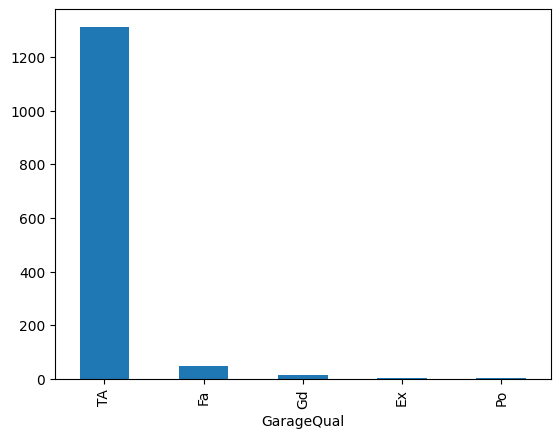

In [8]:
df['GarageQual'].value_counts().plot(kind='bar')

In [10]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

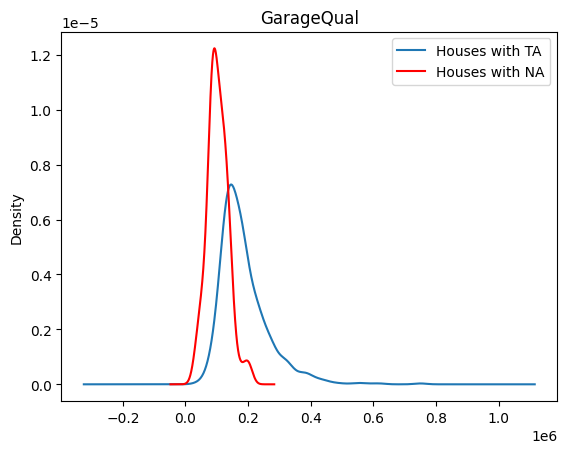

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax = ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',color = 'red', ax = ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')


In [14]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [15]:
df['GarageQual'].fillna('TA', inplace=True)

Text(0.5, 1.0, 'GarageQual')

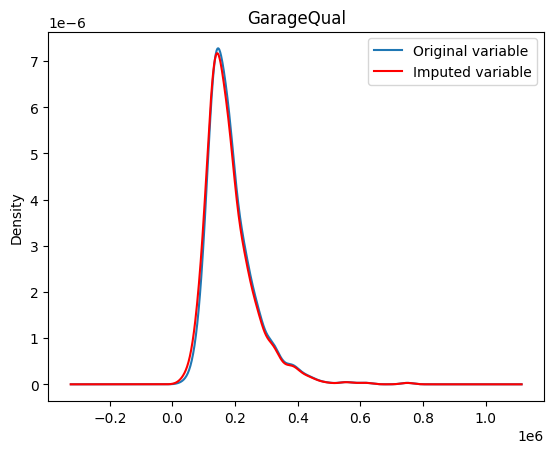

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']),
                                                    df['SalePrice'],
                                                    test_size=.3,
                                                    random_state=0)

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy='most_frequent')

In [21]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [22]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)